In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# setting bigger plot size
sns.set(rc = {'figure.figsize':(23,8)})
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('MarketBasketData//orders.csv')
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,credit_card,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


#### 1. We want to check how many items was bought by order on average.

In [7]:
df_items_per_order = df[['order_id','order_item_id']]

# we are getting just the max number of purchased items from one order
df_items_per_order = df_items_per_order.loc[df_items_per_order.groupby('order_id')['order_item_id'].idxmax()]

df_items_per_order = df_items_per_order.groupby('order_item_id').count().reset_index()

df_items_per_order.rename(columns={"order_id": "number_of_orders",\
                                   "order_item_id":"items_in_order"},inplace=True)

df_items_per_order['percentage']=(100*df_items_per_order['number_of_orders']\
                                    /df_items_per_order['number_of_orders'].sum()).round(2)

df_items_per_order

,items_in_order,number_of_orders,percentage
0,1,85870,90.07
1,2,7275,7.63
2,3,1278,1.34
3,4,484,0.51
4,5,191,0.20
5,6,186,0.20
6,7,22,0.02
7,8,8,0.01
8,9,3,0.00
9,10,8,0.01


-  above table shows nicely how many items are bought in on order, but to have better overview lets draw a barblot

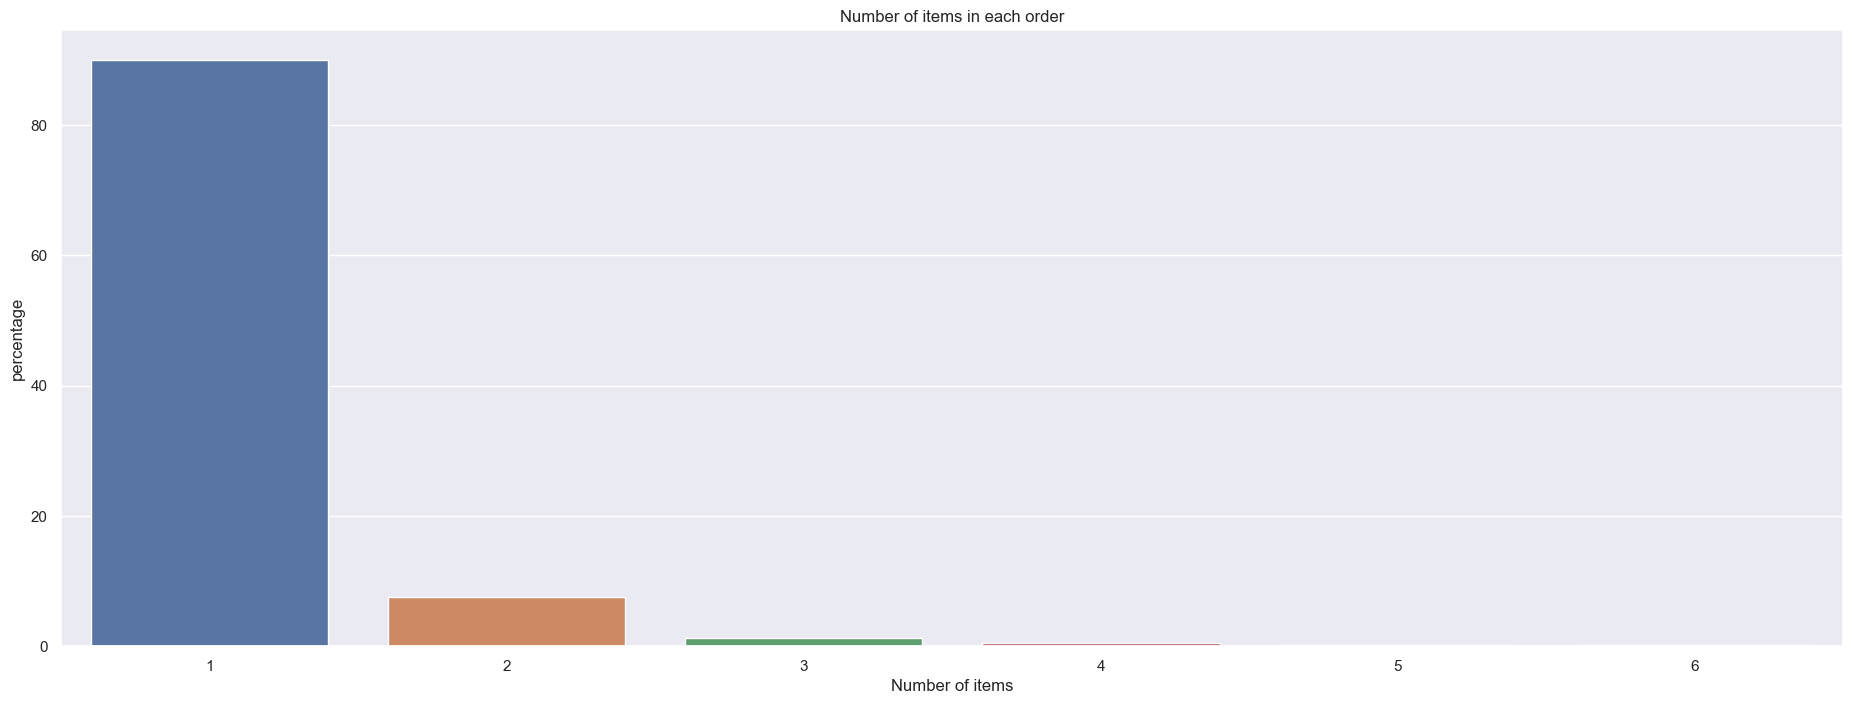

In [8]:
df_items_per_order_filtered = df_items_per_order[(df_items_per_order['number_of_orders']>100)]
sns.barplot(x='items_in_order',y='percentage', data=df_items_per_order_filtered )
plt.title("Number of items in each order")
plt.xlabel("Number of items")
plt.show()

As we can see most of costumers has 1 item in order.

#### 2.  We want to focus on delivery costs now. We will check what percentage of cost order is delivery

In [9]:
df_percentage_of_deliver_costs = df[['order_id','price','freight_value']].groupby('order_id').sum().reset_index()

df_percentage_of_deliver_costs['whole_cost'] = df_percentage_of_deliver_costs[['price','freight_value']].sum(axis=1)

df_percentage_of_deliver_costs['%_of_cost']=round(df_percentage_of_deliver_costs['freight_value']
                                /df_percentage_of_deliver_costs['whole_cost'],3)*100

df_percentage_of_deliver_costs

,order_id,price,freight_value,whole_cost,%_of_cost
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19,18.4
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83,7.7
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87,8.2
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78,49.6
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04,8.3
...,...,...,...,...,...
95336,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,343.40,12.6
95337,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,386.53,9.5
95338,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,116.85,14.5
95339,fffe18544ffabc95dfada21779c9644f,55.99,8.72,64.71,13.5


C:\Users\user\AppData\Local\Temp\ipykernel_23132\3327885715.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_percentage_of_deliver_costs['%_of_cost'])


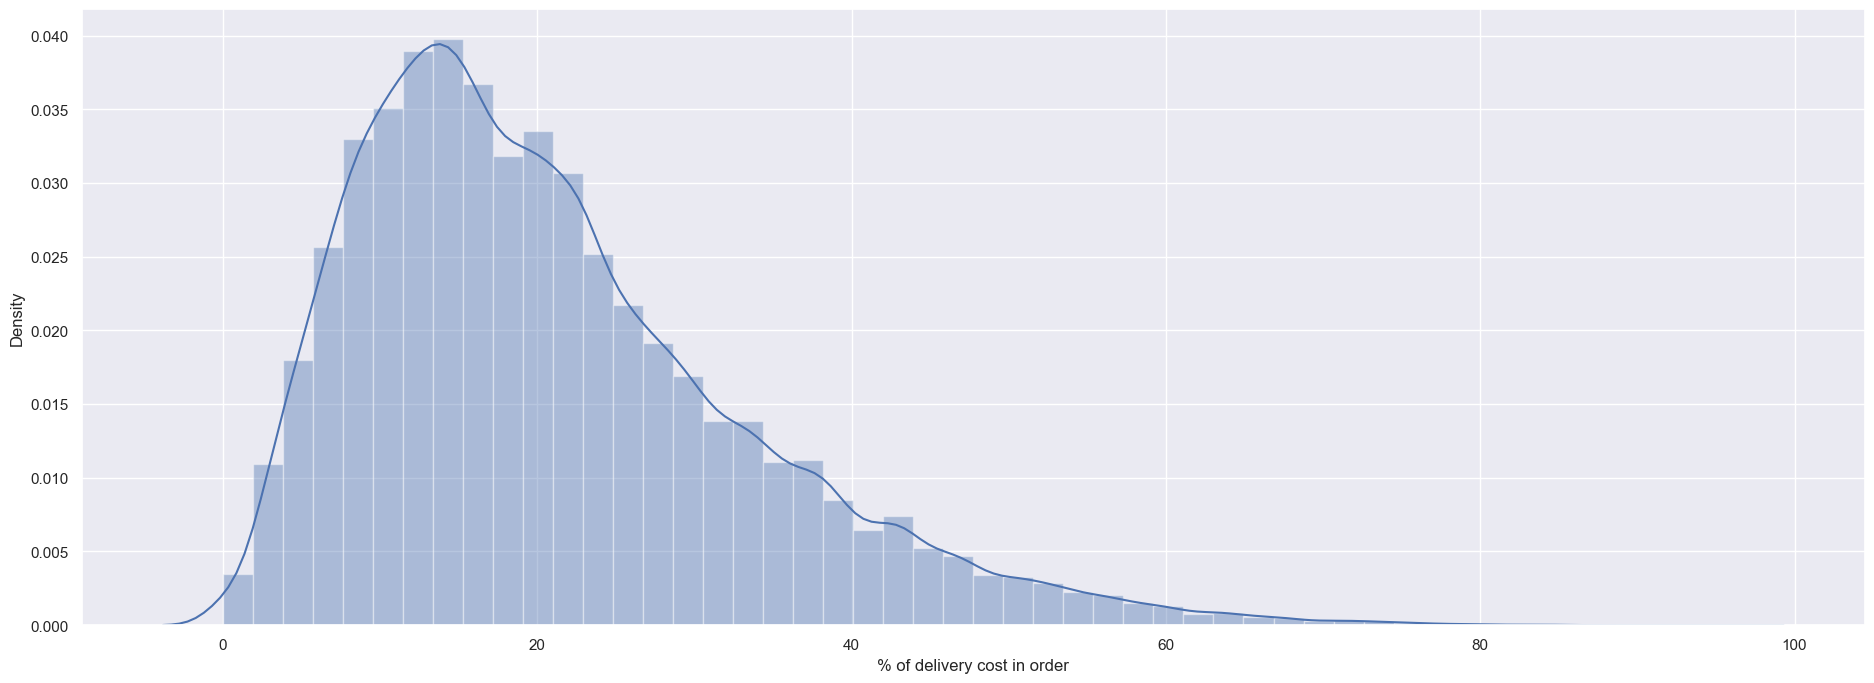

In [10]:
sns.distplot(df_percentage_of_deliver_costs['%_of_cost'])
plt.xlabel("% of delivery cost in order")
plt.show()

In [11]:
ranges=[0,5,10,20,30,40,50,70,100]
custom_labels = ['<5%','5%-10%','10%-20%','20%-30%','30%-40%','40%-50%','50%-70%','70%-100%']
df_percentage_of_deliver_costs['%_label']= pd.cut(df_percentage_of_deliver_costs['%_of_cost'],bins=ranges,labels=custom_labels)
df_percentage_of_deliver_costs

,order_id,price,freight_value,whole_cost,%_of_cost,%_label
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19,18.4,10%-20%
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83,7.7,5%-10%
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87,8.2,5%-10%
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78,49.6,40%-50%
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04,8.3,5%-10%
...,...,...,...,...,...,...
95336,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,343.40,12.6,10%-20%
95337,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,386.53,9.5,5%-10%
95338,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,116.85,14.5,10%-20%
95339,fffe18544ffabc95dfada21779c9644f,55.99,8.72,64.71,13.5,10%-20%


In [12]:
df_percentage_of_deliver_costs=df_percentage_of_deliver_costs[['%_label','order_id']].groupby('%_label').count().reset_index()
df_percentage_of_deliver_costs

,%_label,order_id
0,<5%,4287
1,5%-10%,13519
2,10%-20%,34779
3,20%-30%,22945
4,30%-40%,11374
5,40%-50%,5066
6,50%-70%,2838
7,70%-100%,198


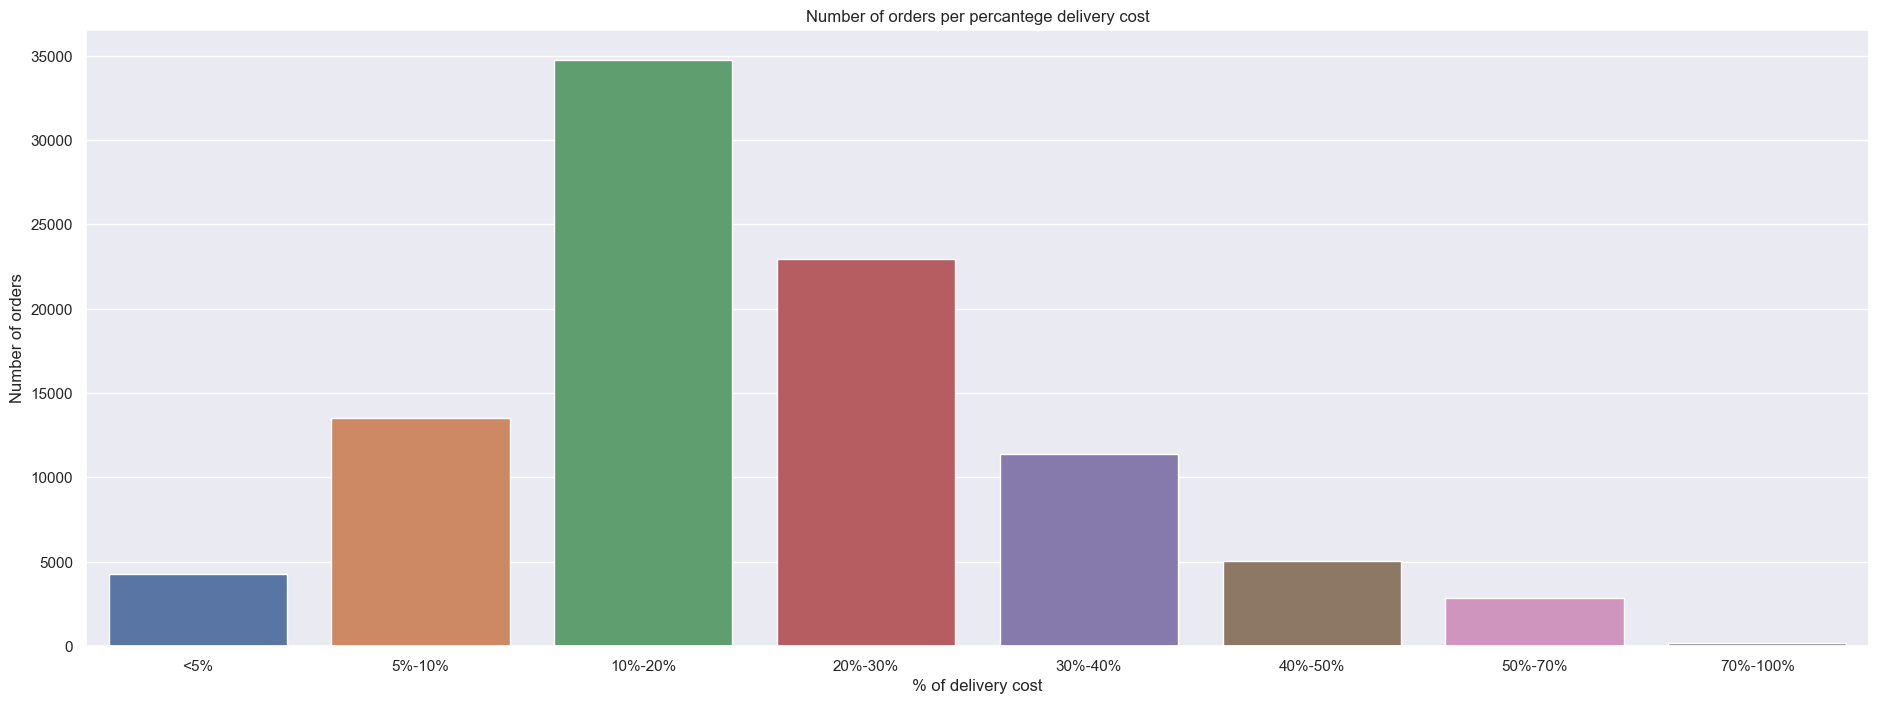

In [13]:
sns.barplot(x='%_label',y='order_id', data=df_percentage_of_deliver_costs )
plt.title("Number of orders per percantege delivery cost")
plt.ylabel("Number of orders")
plt.xlabel("% of delivery cost")
plt.show()

- Maximum orders between  10%-20%
#### 3 We want to check is diffrent between estimation delivery time and actual time has any impact on client review

In [16]:
df_delivery_diff = df[['order_id','order_estimated_delivery_date','order_delivered_customer_date']]
df_delivery_diff[['order_delivered_customer_date','order_estimated_delivery_date']]=\
                df_delivery_diff[['order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)
df_delivery_diff['day_diff']=(df_delivery_diff['order_estimated_delivery_date']-\
                df_delivery_diff['order_delivered_customer_date']).dt.days
df_delivery_diff.head()

,order_id,order_estimated_delivery_date,order_delivered_customer_date,day_diff
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-18,2017-10-10 21:25:13,7
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-13,2018-08-07 15:27:45,5
2,47770eb9100c2d0c44946d9cf07ec65d,2018-09-04,2018-08-17 18:06:29,17
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-15,2017-12-02 00:28:42,12
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-26,2018-02-16 18:17:02,9


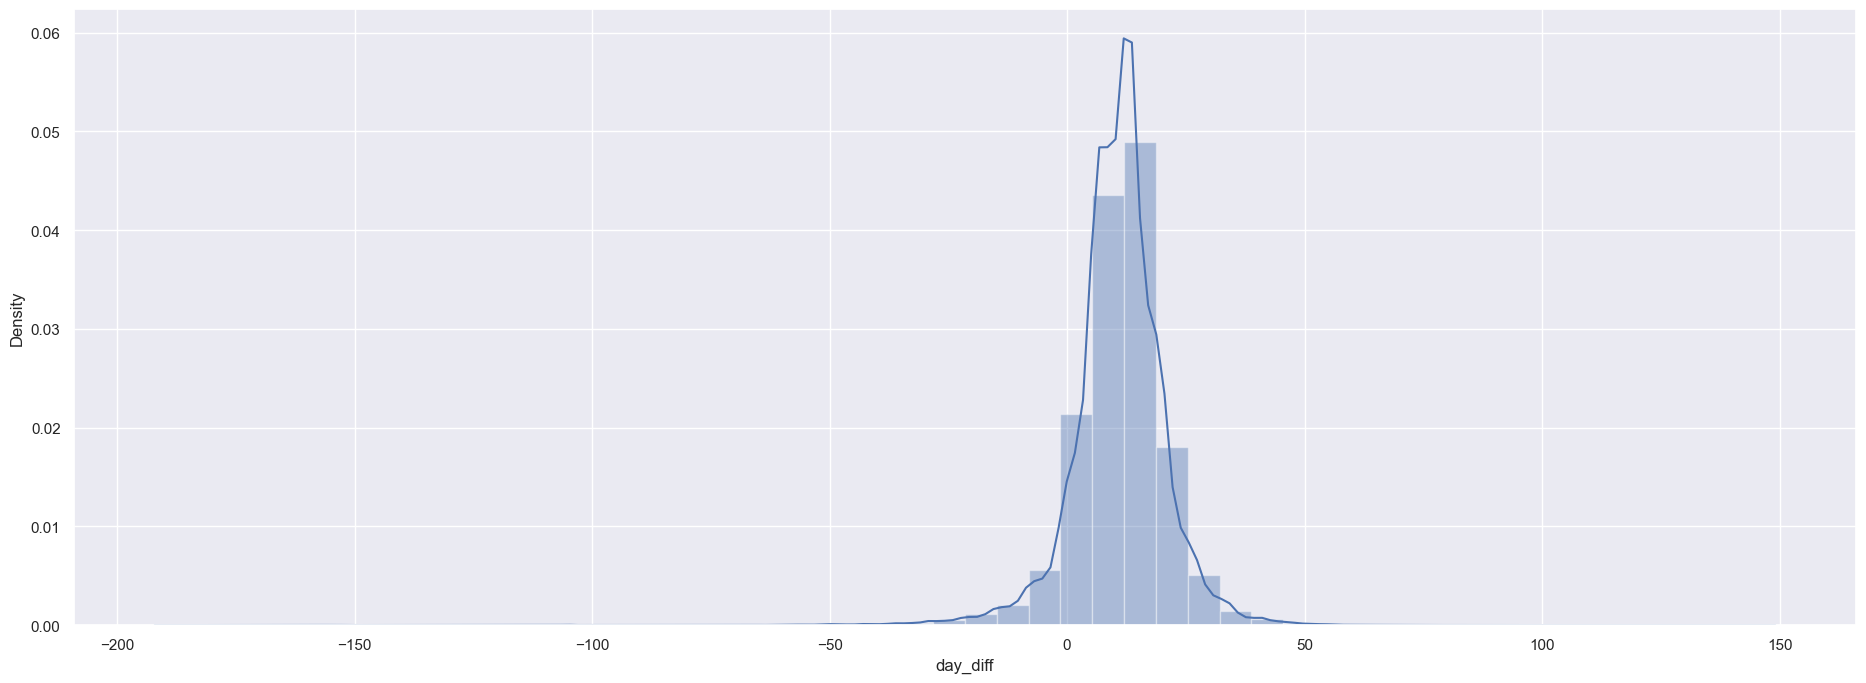

In [17]:
sns.distplot(df_delivery_diff['day_diff'])
plt.show()

 - based on above plot we can see that most delivery different is between -20 days to 40, so now we can filter this to have better overiview

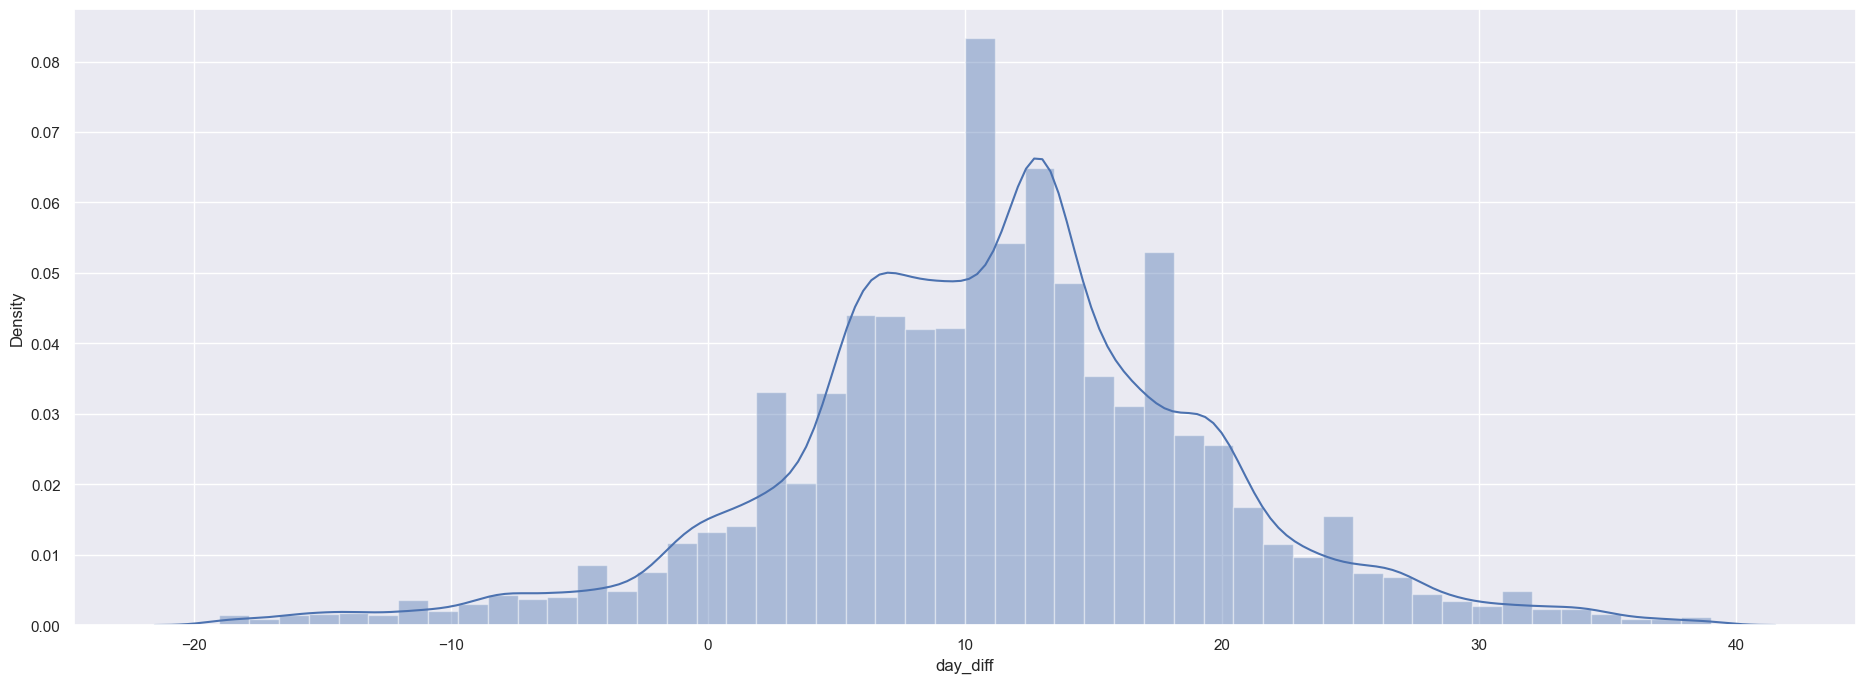

In [18]:
df_delivery_diff_filter=df_delivery_diff[(df_delivery_diff['day_diff']<40) & (df_delivery_diff['day_diff']>-20)]
sns.distplot(df_delivery_diff_filter['day_diff'])
plt.show()

In [19]:
df_order_reviews = olist_order_reviews[['order_id','review_score','review_creation_date','review_answer_timestamp']]

NameError: name 'olist_order_reviews' is not defined